# Colab Environment Settings

In [106]:
import os
from google.colab import drive
# Authenticate for google drive integration
drive.mount('/gdrive/',force_remount=True)

Mounted at /gdrive/


In [107]:
import os
os.chdir("/gdrive/My Drive/EDAMI_PROJECT_GR_7")

# Reading Dataset

In [108]:
import pandas as pd
import numpy as np

random_state = 0
df = pd.read_csv("data.csv",index_col="Unnamed: 0")
df.describe()

,label
count,2225.000000
mean,1.958202
std,1.428310
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [109]:
df.head()

,text,label
0,Tate & Lyle boss bags top award\n\nTate & Lyle...,0
1,Halo 2 sells five million copies\n\nMicrosoft ...,4
2,MSPs hear renewed climate warning\n\nClimate c...,2
3,Pavey focuses on indoor success\n\nJo Pavey wi...,3
4,Tories reject rethink on axed MP\n\nSacked MP ...,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


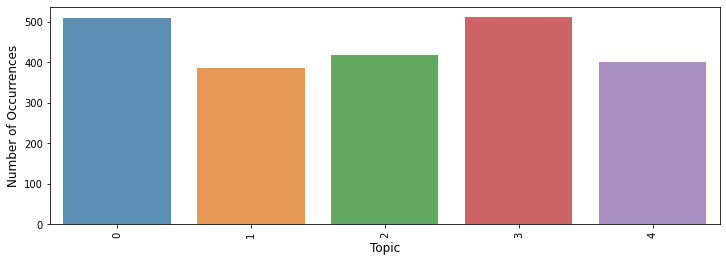

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns 

def plotBar(df):
  topic = df['label'].value_counts()
  plt.figure(figsize=(12,4))
  sns.barplot(topic.index, topic.values, alpha=0.8)
  plt.ylabel('Number of Occurrences', fontsize=12)
  plt.xlabel('Topic', fontsize=12)
  plt.xticks(rotation=90)
  plt.show();
plotBar(df)

In [111]:
subsets = []

for i in range(0,1800,300):
  subsets.append(df[i:i+300].reset_index(drop=True))
subsets.append(df[1800:].reset_index(drop=True))
len(subsets)

7

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

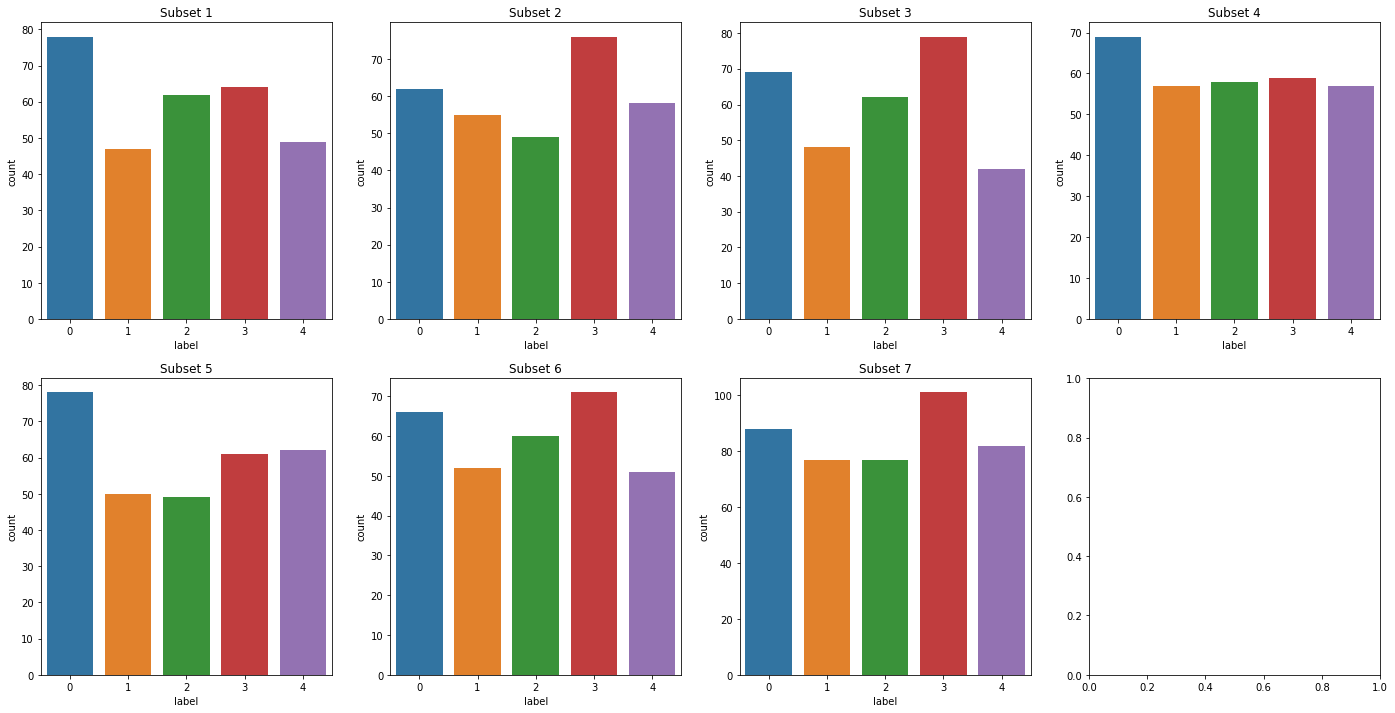

In [112]:
fig, ax =plt.subplots(2,4)
fig.set_figheight(12)
fig.set_figwidth(24)
sns.countplot(subsets[0].label, ax=ax[0][0]).set_title('Subset 1')
sns.countplot(subsets[1].label, ax=ax[0][1]).set_title('Subset 2')
sns.countplot(subsets[2].label, ax=ax[0][2]).set_title('Subset 3')
sns.countplot(subsets[3].label, ax=ax[0][3]).set_title('Subset 4')
sns.countplot(subsets[4].label, ax=ax[1][0]).set_title('Subset 5')
sns.countplot(subsets[5].label, ax=ax[1][1]).set_title('Subset 6')
sns.countplot(subsets[6].label, ax=ax[1][2]).set_title('Subset 7')
fig.show()

# Data Cleaning

In [113]:
import string
def remove_punctuation(text):
    punct_list = list(string.punctuation)
    for punc in punct_list:
        if punc in text:
            text = text.replace(punc, ' ')
    return text.strip()

In [114]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def stemming_and_lowercase(text):
  stemmer= PorterStemmer()
  tokenized_text = word_tokenize(text)
  stemmed_text = ""
  for word in tokenized_text:
      stemmed_text += " " + stemmer.stem(word.lower())
  return stemmed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
def lowercase(text):
  tokenized_text = word_tokenize(text)
  l_text = ""
  for word in tokenized_text:
      l_text += " " + word.lower()
  return l_text

In [116]:
def clean_data(df):
  for row in range(len(df)):
    tmp = df['text'][row].replace('\n',' ')   #remove new lines
    tmp = remove_punctuation(tmp)             #remove punctuation
    #tmp = stemming_and_lowercase(tmp)         #stemming and all letters to lowercase
    tmp = lowercase(tmp)
    df['text'][row] = tmp
  
  return df


In [117]:
df_cleaned = []
for subset in subsets:
  df_cleaned.append(clean_data(subset))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [118]:
df_cleaned[0].head()

,text,label
0,tate lyle boss bags top award tate lyle s chi...,0
1,halo 2 sells five million copies microsoft is...,4
2,msps hear renewed climate warning climate cha...,2
3,pavey focuses on indoor success jo pavey will...,3
4,tories reject rethink on axed mp sacked mp ho...,2


# Vectorization

### TF-IDF 

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
features = []
for df_subset in df_cleaned:
  vec = TfidfVectorizer(stop_words="english")
  vec.fit(df_subset.text.values)
  features.append(vec.transform(df_subset.text.values))

In [120]:
#dimensions feature vectors
for i in range(7):
  print("subset {}: dimension ".format(i) + str(features[i].toarray().shape))

subset 0: dimension (300, 11719)
subset 1: dimension (300, 11533)
subset 2: dimension (300, 11213)
subset 3: dimension (300, 12085)
subset 4: dimension (300, 11304)
subset 5: dimension (300, 11539)
subset 6: dimension (425, 13392)


### Glove Embedding

In [121]:
GLOVE_EMBEDDING = False

In [122]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [123]:
glove_embeddings = np.load('glove.840B.300d.pkl', allow_pickle=True)

In [124]:
print("Number of words: " + str(len(glove_embeddings.keys())))
print("Dimension of the word vectors: " + str(len(glove_embeddings['example'])))

Number of words: 2196008
Dimension of the word vectors: 300


In [125]:
if GLOVE_EMBEDDING:
  count = 0
  uncovered_words = {}
  covered_words = {}
  for text in df_cleaned.text:
      for word in text.split():   
          if word not in glove_embeddings.keys():
              count += 1
              if word not in uncovered_words:
                  uncovered_words[word] = 1
              else:
                  uncovered_words[word] += 1   
          else:
              if word not in covered_words:
                  covered_words[word] = 1
              else:
                  covered_words[word] += 1
  print("Number of unique words in dataset: " + str(len(covered_words) + len(uncovered_words) ))
  print(" Number of covered words: " + str(len(covered_words)))
  print(" Number of uncovered words: " + str(len(uncovered_words)))
  print("Top 25 words uncovered by glove")
  pd.DataFrame([uncovered_words]).T.reset_index().sort_values(by = 0, ascending = False)[:25]


  #word tokenize

  tokenizer_keras = Tokenizer( oov_token = "<UNK>")
  tokenizer_keras.fit_on_texts(df_cleaned['text'])
  word_index = tokenizer_keras.word_index  
  vocab_size_keras = len(word_index)
  embedding_dim = len(glove_embeddings['example'] )    
  list(word_index.items())[0:5]

  #embedding matrix

  embedding_matrix = np.zeros((vocab_size_keras+1,embedding_dim))
  for word, i in word_index.items():
      if word in glove_embeddings.keys():
          embedding_vector = glove_embeddings[word]
          embedding_matrix[i] = embedding_vector
  print(embedding_matrix)

  # GLOVE VECTOR FOR TRAINING

  X = embedding_matrix
  X.shape



In [126]:
# TEST DATA

from sklearn.preprocessing import StandardScaler
df_test = pd.read_csv("testdata.txt") # Reading from the data file

dataset = df_test.astype(float).values.tolist()
# normalize dataset
X = StandardScaler().fit_transform(dataset)
X[:10]

array([[-0.15082018, -0.75332837],
       [-1.7609798 , -0.59668755],
       [-1.67796895,  0.4316142 ],
       [-0.5132503 , -0.20210474],
       [ 1.79095699,  0.73858024],
       [ 0.87617868,  0.53494714],
       [ 2.00530733,  0.43140997],
       [-0.22911293, -0.62027751],
       [-0.14212963, -1.81366516],
       [ 0.56623597,  0.30664191]])

# Visualization

In [127]:
from sklearn.decomposition import PCA
def reduce_2d_and_visualize(X,Y,show_grid=True,title='title'):

  pca = PCA(n_components=2, random_state=random_state)
  reduced_features = pca.fit_transform(X)
  f = plt.figure()
  plt.scatter(reduced_features[:,0], reduced_features[:,1], c=Y)
  plt.grid(show_grid)
  plt.title(title, size=16)


# K-nearest neighbor distance 

In [128]:
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    p=-2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm


In [129]:
features[0]

<300x11719 sparse matrix of type '<class 'numpy.float64'>'
	with 44471 stored elements in Compressed Sparse Row format>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


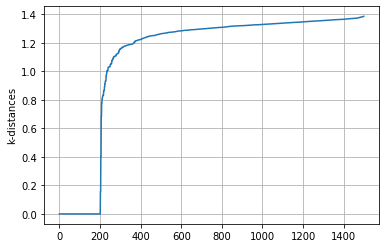

In [130]:
m, m2= k_distances2(features[0].toarray(), 5)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

# DBSCAN Training

In [252]:
model = "DBSCAN"
#model = "HDBSCAN"

In [342]:
i = 6#subset number

In [343]:
if model == "DBSCAN":
  clustering = DBSCAN(eps=1.31, min_samples=5).fit(features[i])
  clustering.labels_[:100]

In [344]:
if model == "HDBSCAN":
  import hdbscan

  clustering = hdbscan.HDBSCAN()
  clustering.labels_ = clusterer.fit_predict(features[i])

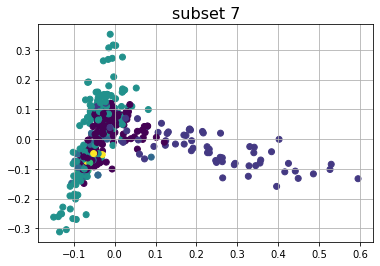

In [345]:
reduce_2d_and_visualize(features[i].toarray(),clustering.labels_,title="subset {}".format(i+1))

In [346]:
cluster_num = pd.Series(clustering.labels_).describe()['max'] + 2 
cluster_num

7.0

In [347]:
#subset 1 eps=1.33, min_samples=10
#2 eps=1.33, min_samples=9
#3 eps=1.33, min_samples=7
#4 eps=1.31, min_samples=5
#5 eps=1.31, min_samples=5
#6eps=1.31, min_samples=6
#7eps=1.31, min_samples=6

# Evaluation

## For labelled dataset

In [348]:
actual_labels = df_cleaned[i]['label']

### Random index

In [349]:
from sklearn.metrics.cluster import adjusted_rand_score
round(adjusted_rand_score(actual_labels,clustering.labels_) , 4)

0.1665

### Mutual_info_score 

In [350]:
from sklearn.metrics import adjusted_mutual_info_score 
adjusted_mutual_info_score(actual_labels,clustering.labels_).round(4)

0.301

### Homogenity Score

In [351]:
from sklearn.metrics import homogeneity_score
homogeneity_score(actual_labels,clustering.labels_).round(4)

0.2979

## For unlabelled dataset

### Silhoutette Coefficent

In [352]:
from sklearn.metrics import silhouette_score
silhouette_score(features[i], labels=clustering.labels_).round(4)

0.0069

### Calinski Harabasz score

In [353]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(features[i].toarray(), labels=clustering.labels_).round(4)

2.4924